<a href="https://colab.research.google.com/github/Pakabudu/Correlation-analysis-with-Python/blob/main/Superstore_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importation of python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv(r"/content/sample_data/train.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# calculating number of null values in column postal code

null_count = df['Postal Code'].isnull().sum()
print(null_count)

11


In [ ]:
# filling null values
df["Postal Code"].fillna(0, inplace = True)

df['Postal Code'] = df['Postal Code'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


### Checking for duplicates

In [ ]:
if df.duplicated().sum() > 0:  #
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


# Exploratory Data Analysis
## Customer Analysis

In [ ]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


### Customer segmentation

- Group customers based on segments

In [ ]:
# Types of customers

types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [ ]:
# Count unique values in 'Segment' and reset the index to turn them into a column
number_of_customers = df['Segment'].value_counts().reset_index()

# Correct the renaming of columns based on your requirements
number_of_customers = number_of_customers.rename(columns={'Segment': 'Total Customers'})

# Print the renamed DataFrame to confirm correct renaming
print(number_of_customers.head())

  Total Customers  count
0        Consumer   5101
1       Corporate   2953
2     Home Office   1746


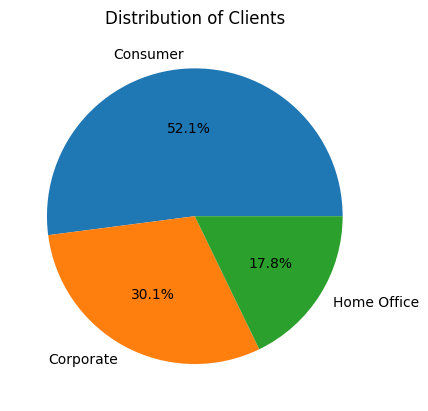

Index(['Total Customers', 'count'], dtype='object')


In [ ]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Total Customers'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Distribution of Clients')
plt.show()
print(number_of_customers.columns)

In [ ]:
# Customers and Sales

# Group the data by the "Segment" column and calculate the total sales for each segment

sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Customer Type', 'Sales': 'Total Sales'})

print(sales_per_segment)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


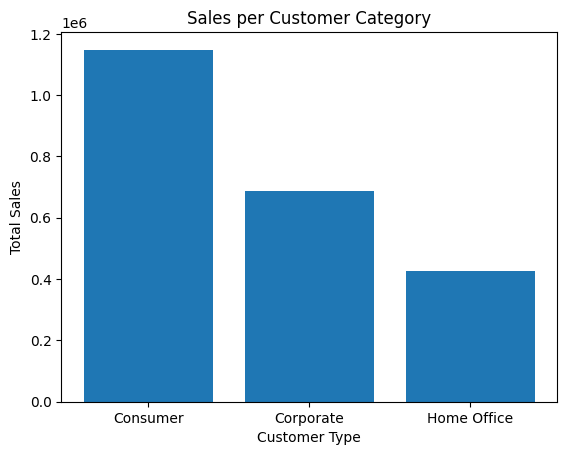

In [ ]:
# Ploting a bar graph

plt.bar(sales_per_segment['Customer Type'], sales_per_segment['Total Sales'])

# Labels
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.show()


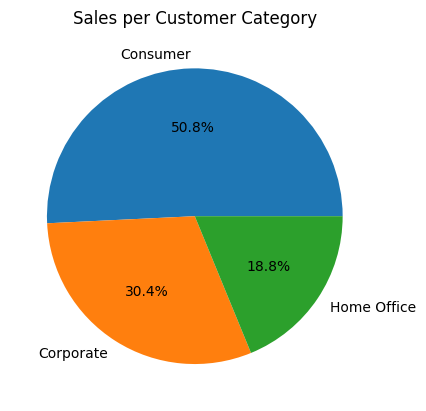

In [ ]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Customer Type'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Sales per Customer Category')
plt.show()

In [ ]:
# Number of customers in each segment

customer_segmentation = df['Segment'].value_counts().reset_index()
customer_segmentation = customer_segmentation.rename(columns={'index': 'Customer Type', 'Segment': 'Total Customers'})

# customer_segmentation = df['Segment'].value_counts().reset_index().rename(columns={'index': 'Customer Type', 'Segment': 'Total Customers'})

print(customer_segmentation)

  Total Customers  count
0        Consumer   5101
1       Corporate   2953
2     Home Office   1746


**Customer Loyalty**
- Examine the repeat purchase behavior of customers

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [ ]:
# Group the data by Customer ID, Customer Name, Segments, and calculate the frequency of orders for each customer
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# Rename the column to represent the frequency of orders
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

# Identify repeat customers (customers with order frequency greater than 1)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]

# Sort "repeat_customers" in descending order based on the "Order Frequency" column
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

# Print the result- the first 10 and reset index
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     CK-12205  Chloris Kastensmidt     Consumer            32
5     SV-20365          Seth Vernon     Consumer            32
6     JD-15895     Jonathan Doherty    Corporate            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    Dp-13240          Dean percer  Home Office            29


### Sales by Customer
- Identify top-spending customers based on their total purchase amount

In [ ]:
# Group the data by customer IDs and calculate the total purchase (sales) for each customer
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Sort the customers based on their total purchase in descending order to identify top spenders
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

# Print the top-spending customers
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


### Shipping

In [ ]:
# Types of Shipping methods

types_of_customers = df['Ship Mode'].unique()
print(types_of_customers)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [ ]:
# Frequency of use of a shipping methods

shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index':'Use Frequency', 'Ship Mode': 'Mode of Shipment', 'count' : 'Use Frequency'})

print(shipping_model)


  Mode of Shipment  Use Frequency
0   Standard Class           5859
1     Second Class           1902
2      First Class           1501
3         Same Day            538


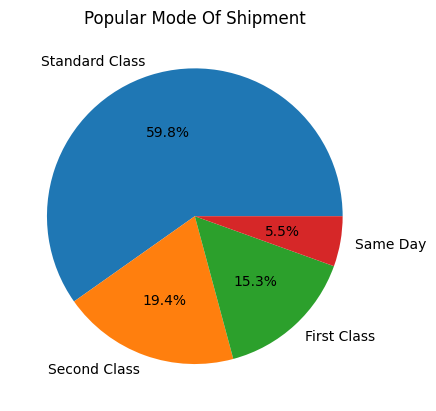

In [ ]:
# Plotting a Pie chart

plt.pie(shipping_model['Use Frequency'], labels=shipping_model['Mode of Shipment'], autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Popular Mode Of Shipment')
plt.show()


### Geographical Analysis

In [ ]:
# Customers per state

state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index':'State', 'State':'Number_of_customers'})

print(state.head(20))

   Number_of_customers  count
0           California   1946
1             New York   1097
2                Texas    973
3         Pennsylvania    582
4           Washington    504
5             Illinois    483
6                 Ohio    454
7              Florida    373
8             Michigan    253
9       North Carolina    247
10            Virginia    224
11             Arizona    223
12           Tennessee    183
13            Colorado    179
14             Georgia    177
15            Kentucky    137
16             Indiana    135
17       Massachusetts    135
18              Oregon    122
19          New Jersey    122


In [ ]:
# Customers per city

city = df['City'].value_counts().reset_index()
city= city.rename(columns={'index':'City', 'City':'Number_of_customers'})

print(city.head(15))

   Number_of_customers  count
0        New York City    891
1          Los Angeles    728
2         Philadelphia    532
3        San Francisco    500
4              Seattle    426
5              Houston    374
6              Chicago    308
7             Columbus    221
8            San Diego    170
9          Springfield    161
10              Dallas    156
11        Jacksonville    125
12             Detroit    115
13              Newark     92
14             Jackson     82


In [ ]:
# Sales per state

# Group the data by state and calculate the total purchases (sales) for each state
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

# Sort the states based on their total sales in descending order to identify top spenders
top_sales = state_sales.sort_values(by='Sales', ascending=False)

# Print the states
print(top_sales.head(20).reset_index(drop=True))

             State        Sales
0       California  446306.4635
1         New York  306361.1470
2            Texas  168572.5322
3       Washington  135206.8500
4     Pennsylvania  116276.6500
5          Florida   88436.5320
6         Illinois   79236.5170
7         Michigan   76136.0740
8             Ohio   75130.3500
9         Virginia   70636.7200
10  North Carolina   55165.9640
11         Indiana   48718.4000
12         Georgia   48219.1100
13        Kentucky   36458.3900
14         Arizona   35272.6570
15      New Jersey   34610.9720
16        Colorado   31841.5980
17       Wisconsin   31173.4300
18       Tennessee   30661.8730
19       Minnesota   29863.1500


In [ ]:
# Group the data by state and calculate the total purchase (sales) for each city
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

# Sort the cities based on their sales in descending order to identify top cities
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

# Print the states
print(top_city_sales.head(20).reset_index(drop=True))

             City        Sales
0   New York City  252462.5470
1     Los Angeles  173420.1810
2         Seattle  116106.3220
3   San Francisco  109041.1200
4    Philadelphia  108841.7490
5         Houston   63956.1428
6         Chicago   47820.1330
7       San Diego   47521.0290
8    Jacksonville   44713.1830
9         Detroit   42446.9440
10    Springfield   41827.8100
11       Columbus   38662.5630
12         Newark   28448.0490
13       Columbia   25283.3240
14        Jackson   24963.8580
15      Lafayette   24944.2800
16    San Antonio   21843.5280
17     Burlington   21668.0820
18      Arlington   20214.5320
19         Dallas   20127.9482


In [ ]:
state_city_sales = df.groupby(['State','City'])['Sales'].sum().reset_index()

print(state_city_sales.head(20))

      State           City      Sales
0   Alabama         Auburn   1766.830
1   Alabama        Decatur   3374.820
2   Alabama       Florence   1997.350
3   Alabama         Hoover    525.850
4   Alabama     Huntsville   2484.370
5   Alabama         Mobile   5462.990
6   Alabama     Montgomery   3722.730
7   Alabama     Tuscaloosa    175.700
8   Arizona       Avondale    946.808
9   Arizona  Bullhead City     22.288
10  Arizona       Chandler   1067.403
11  Arizona        Gilbert   4172.382
12  Arizona       Glendale   2917.865
13  Arizona           Mesa   4037.740
14  Arizona         Peoria   1341.352
15  Arizona        Phoenix  11000.257
16  Arizona     Scottsdale   1466.307
17  Arizona   Sierra Vista     76.072
18  Arizona          Tempe   1070.302
19  Arizona         Tucson   6313.016




```
# This is formatted as code
```

## Product Analysis

### Product Category Analysis

- Investigate the sales performance of different product

In [ ]:
# Types of products in the Stores

products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [ ]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
# Types of sub category

product_subcategory = df['Sub-Category'].nunique()
print(product_subcategory)

17


In [ ]:
# Group the data by product category and how many sub-category it has
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
# sort by ascending order
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
# Print the states
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [ ]:
subcategory_count_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

print(subcategory_count_sales)

           Category Sub-Category        Sales
0         Furniture    Bookcases  113813.1987
1         Furniture       Chairs  322822.7310
2         Furniture  Furnishings   89212.0180
3         Furniture       Tables  202810.6280
4   Office Supplies   Appliances  104618.4030
5   Office Supplies          Art   26705.4100
6   Office Supplies      Binders  200028.7850
7   Office Supplies    Envelopes   16128.0460
8   Office Supplies    Fasteners    3001.9600
9   Office Supplies       Labels   12347.7260
10  Office Supplies        Paper   76828.3040
11  Office Supplies      Storage  219343.3920
12  Office Supplies     Supplies   46420.3080
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
15       Technology     Machines  189238.6310
16       Technology       Phones  327782.4480


In [ ]:
# Group the data by product category versus the sales from each product category
product_category = df.groupby(['Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_category = product_category.sort_values(by='Sales', ascending=False)

# Print the states
print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


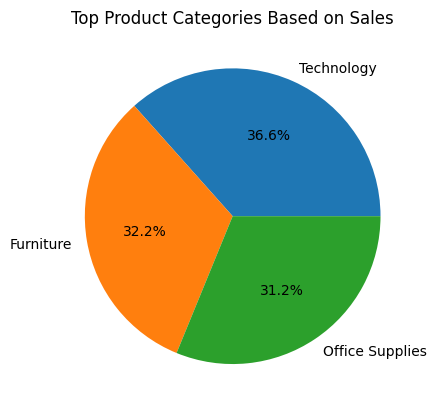

In [ ]:
# Plotting a pie chart
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%')

# set the labels of the pie chart
plt.title('Top Product Categories Based on Sales')

plt.show()


In [ ]:
# Group the data by product sub category versus the sales
product_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_subcategory = product_subcategory.sort_values(by='Sales', ascending=False)

# Print the states
print(top_product_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


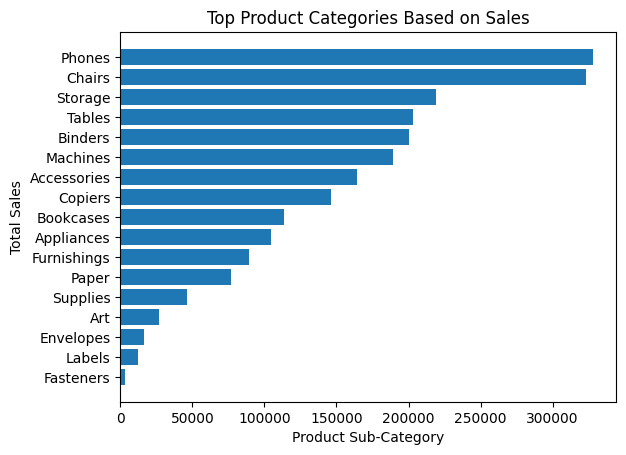

In [ ]:

top_product_subcategory = top_product_subcategory.sort_values(by='Sales', ascending=True)

# Ploting a bar graph

plt.barh(top_product_subcategory['Sub-Category'], top_product_subcategory['Sales'])

# Labels
plt.title('Top Product Categories Based on Sales')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()


## Sales

In [ ]:
# Convert the "Order Date" column to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales':'Total Sales'})

# yearly_sales =
# Print the total sales for each year
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


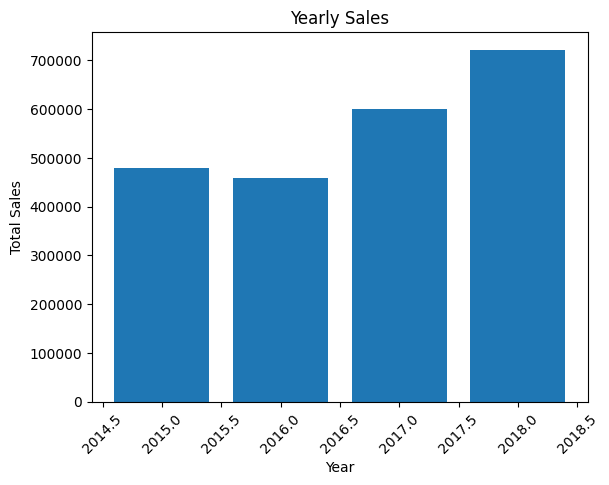

In [ ]:
# Ploting a bar graph

plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

# Labels
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.show()


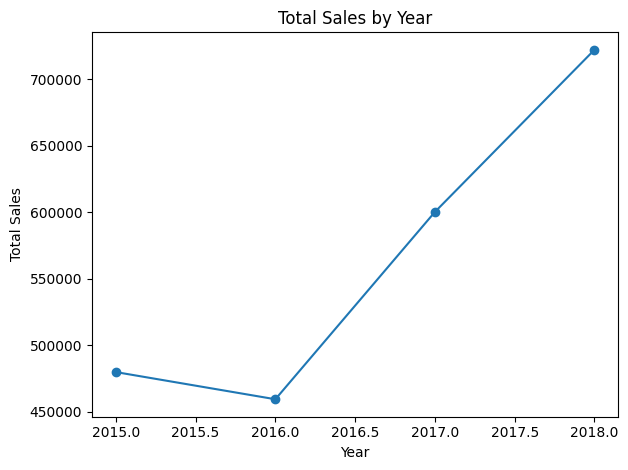

In [ ]:
# Create a line graph for total sales by year
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Display the plot
plt.tight_layout()

plt.show()

In [ ]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2018]

# Calculate the quarterly sales for 2018
quarterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date': 'Quarter', 'Sales':'Total Sales'})


print("Quarterly Sales for 2018:")
print(quarterly_sales)

Quarterly Sales for 2018:
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


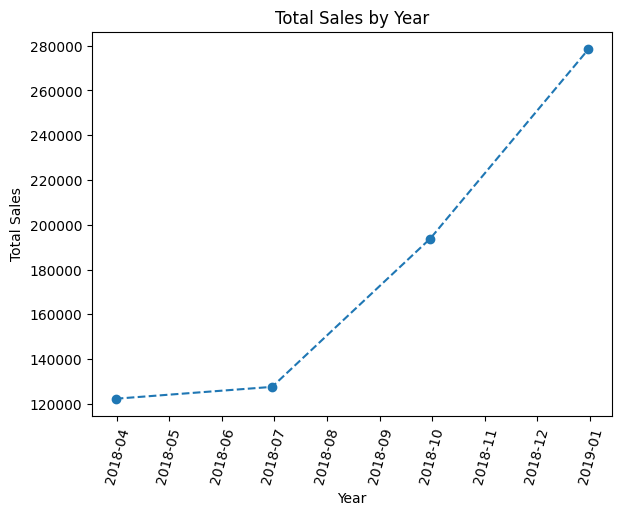

In [ ]:
# Create a line graph for total sales by year
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

In [ ]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Filter the data for the year 2018
year_sales = df[df['Order Date'].dt.year == 2018]

# Calculate the monthly sales for 2018
monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum()

# Renaming the columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales':'Total Montly Sales'})

# Print the monthly and quarterly sales for 2018
print("Monthly Sales for 2018:")
print(monthly_sales)


Monthly Sales for 2018:
        Month  Total Montly Sales
0  2018-01-31          43476.4740
1  2018-02-28          19920.9974
2  2018-03-31          58863.4128
3  2018-04-30          35541.9101
4  2018-05-31          43825.9822
5  2018-06-30          48190.7277
6  2018-07-31          44825.1040
7  2018-08-31          62837.8480
8  2018-09-30          86152.8880
9  2018-10-31          77448.1312
10 2018-11-30         117938.1550
11 2018-12-31          83030.3888


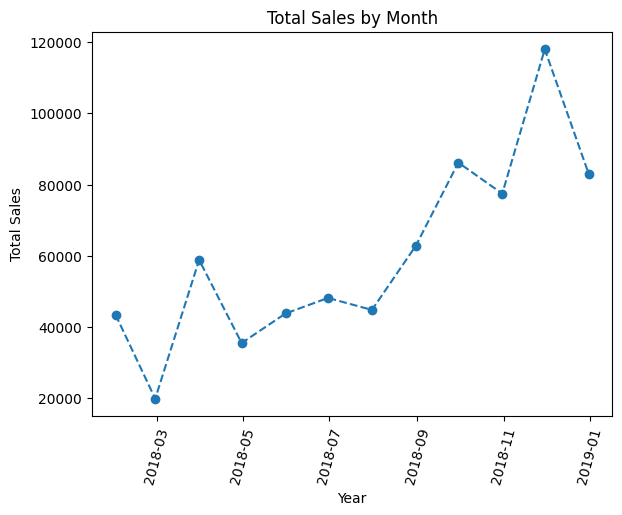

In [ ]:
# Create a line graph for total sales by year
plt.plot(monthly_sales['Month'], monthly_sales['Total Montly Sales'], marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

## Sales Trends

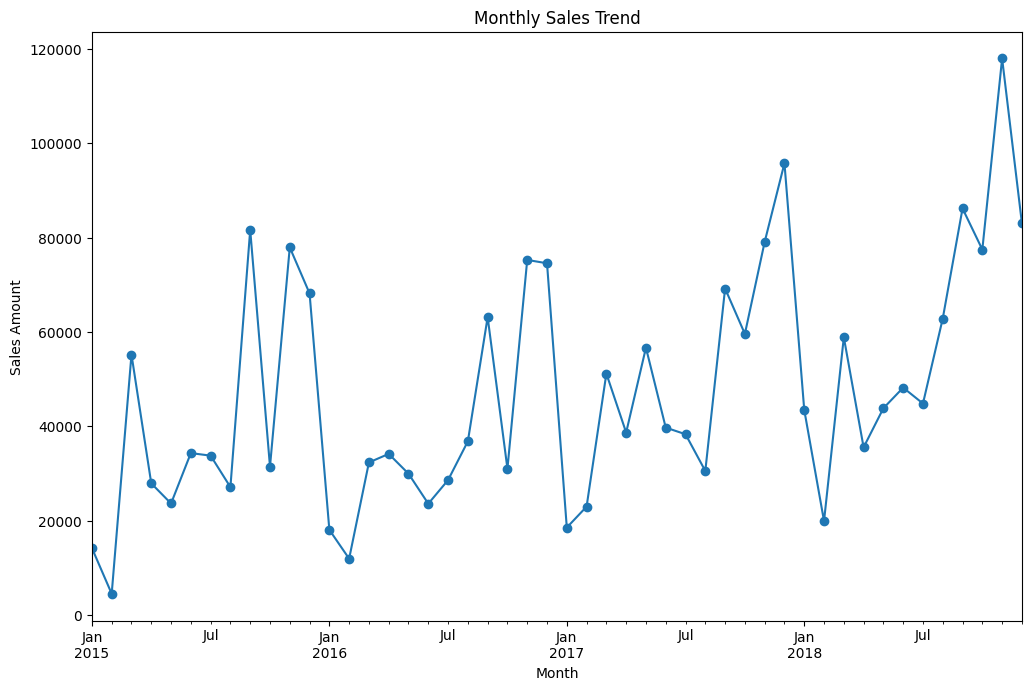

In [ ]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by months and calculate the total sales amount for each month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot the sales trends for months
plt.figure(figsize=(12, 26))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
# plt.tight_layout()
plt.show()

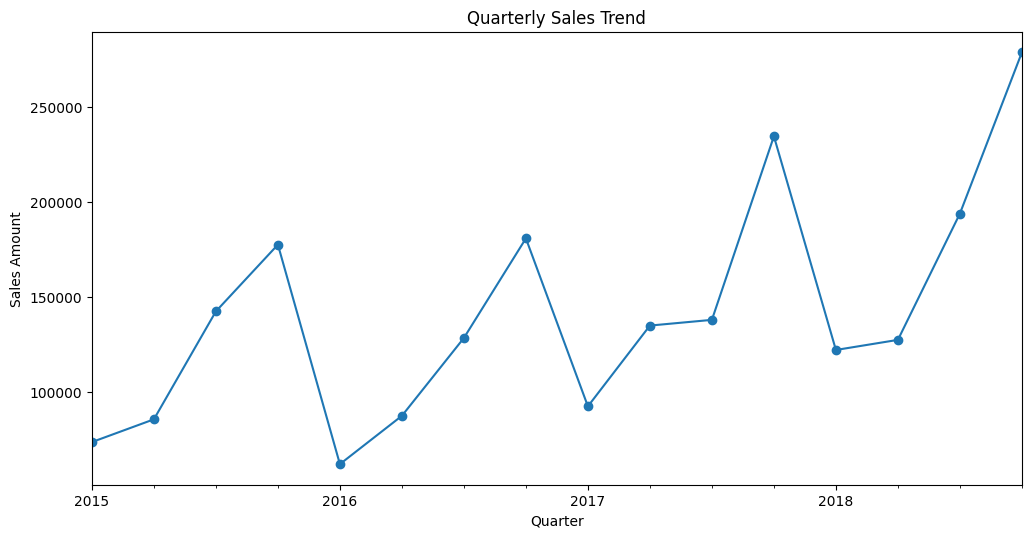

In [ ]:
# Assuming you have a DataFrame named "df" with columns "Order Date" and "Sales amount"

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by quarters and calculate the total sales amount for each quarter
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

# Plot the sales trends for months, quarters, and years
plt.figure(figsize=(12, 20))

# Quarterly Sales Trend
plt.subplot(3, 1, 2)
quarterly_sales.plot(kind='line', marker='o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots
#plt.tight_layout()
plt.show()

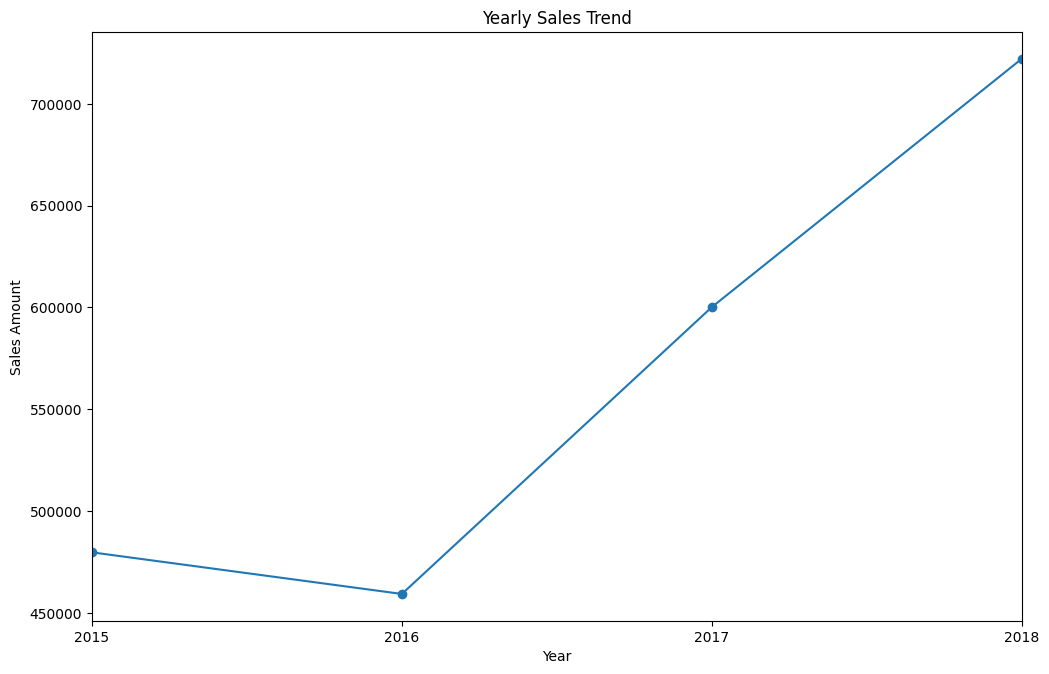

In [ ]:
# Assuming you have a DataFrame named "df" with columns "Order Date" and "Sales amount"

# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()

# Plot the sales trends for quarters
plt.figure(figsize=(12, 26))

# Yearly Sales Trend
plt.subplot(3, 1, 3)
yearly_sales.plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots

plt.show()

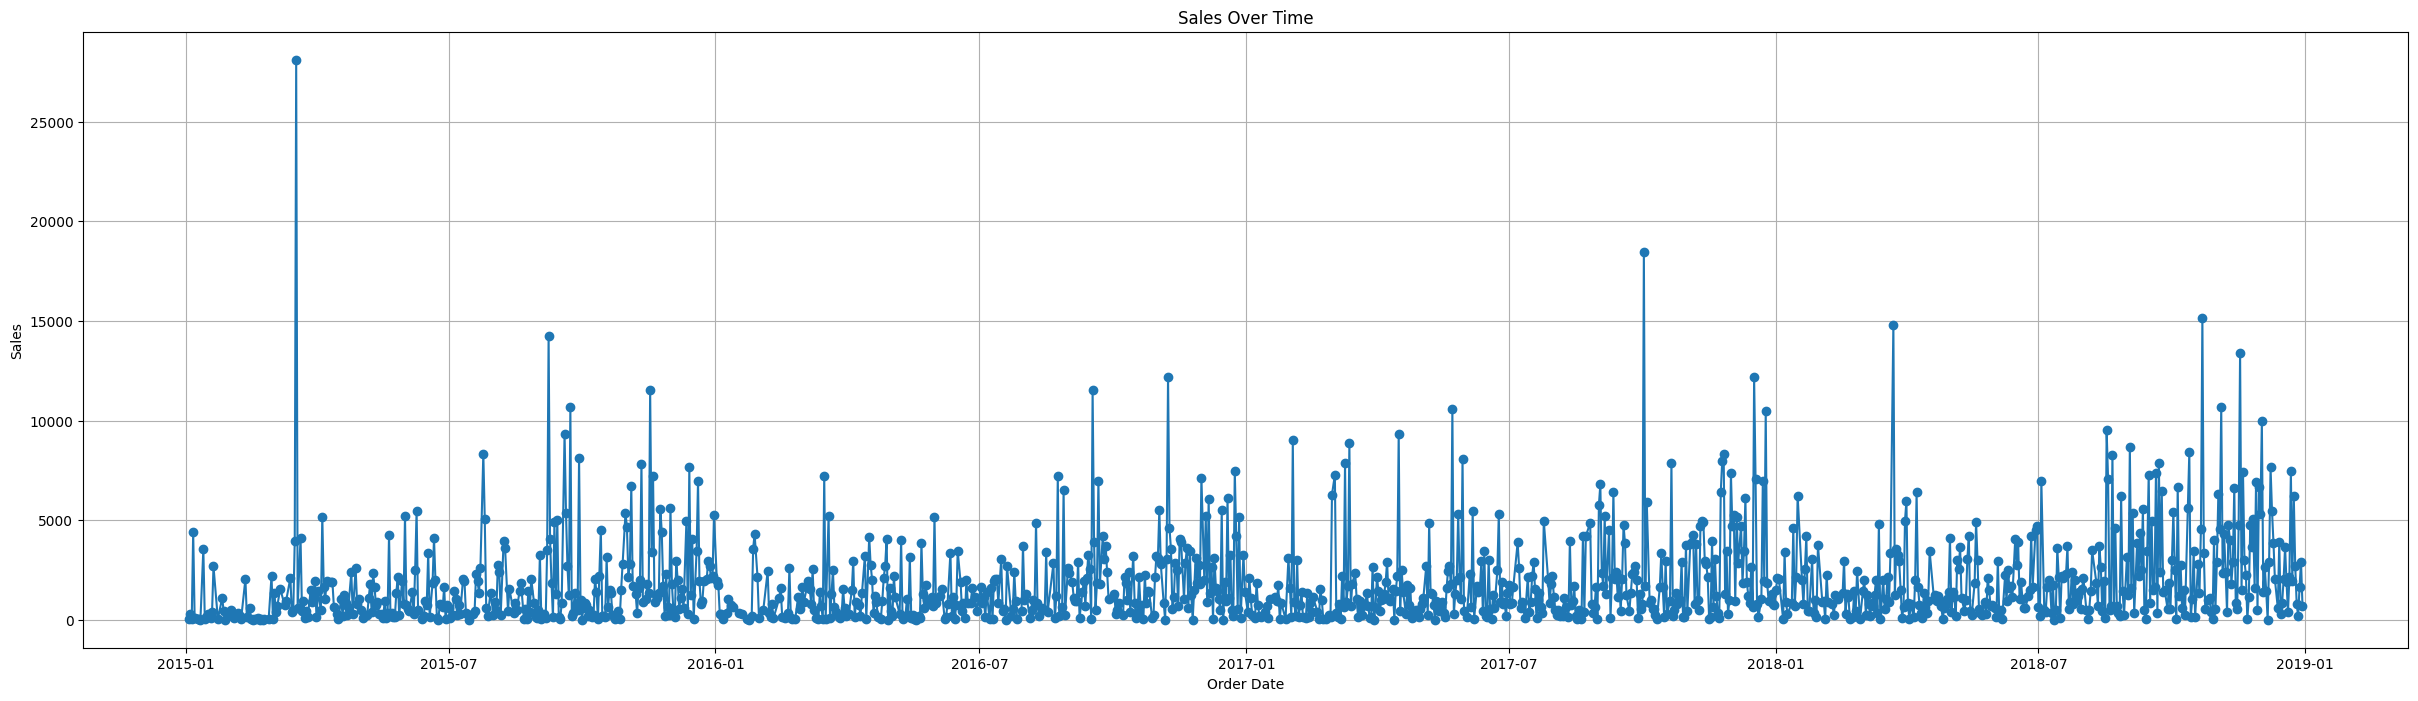

In [ ]:
# Group by "Order Date" and calculate the sum of sales
df_summary = df.groupby('Order Date')['Sales'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(30, 8))
plt.plot(df_summary['Order Date'], df_summary['Sales'], marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialize Plotly in Jupyter Notebook mode
import plotly.io as pio

# Create a mapping for all 50 states
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    showscale=True
))

fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

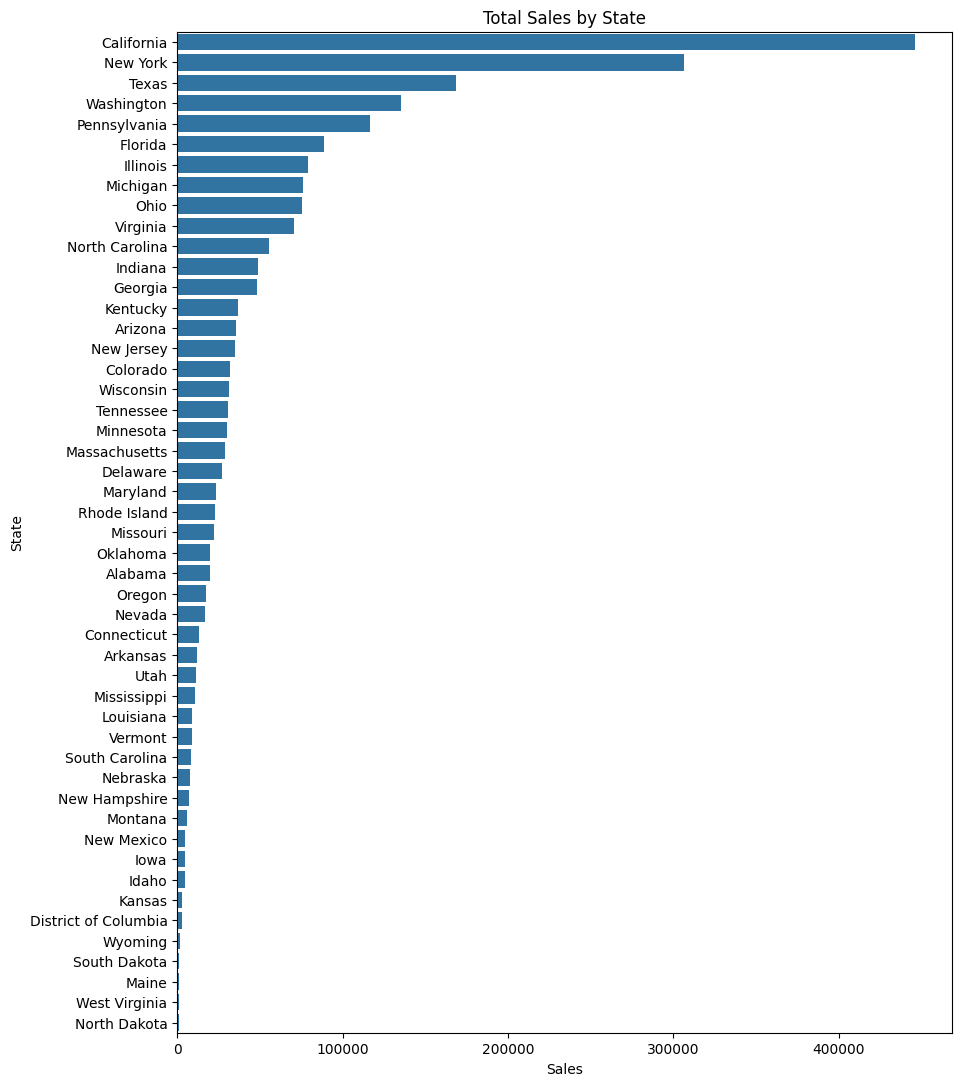

In [ ]:
# Group by state and calculaye the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horinzontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.show()

In [ ]:
import plotly.express as px

# Summarize the Sales data by Category and Sub-Category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Create a nested pie chart
fig = px.sunburst(
    df_summary, path=['Category', 'Sub-Category'], values='Sales')

fig.show()

In [ ]:
# Summarize the Sales data by Category, Ship Mode and Sub-Category
df_summary = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

#Create a treemap
fig = px.treemap(df_summary, path=['Category', 'Ship Mode', 'Sub-Category'], values='Sales')

fig.show()